# Proyecto Integrador Opción 2. (Mercado Automotor):
------------------

Se requiere crear un modelo de regresión capaz de pronosticar el precio de un vehículo a partir de las características del mismo. Dichas características corresponden por ejemplo al consumo de combustible, tamaño de motor, peso del vehículo, clilindraje, etc. de un dataset con datos recopilados en el mercado actual. A demás se requiere un modelo de clasificación que de acuerdo a sus características puedo determinar si el vehículo será gamma alta (vehículo costoso) o gamma baja (vehículo económico).

A continuación se realizan pruebas del modelo de supervisado machine learning KNN (K-Nearest-Neighbor) para la creación de ambos modelos.

#### Modelo KNN sin escalar y cont todas las variables:

1. Importar Librerías necesarias para los modelos KNN-Clasificador y KNN-Regresor:

In [1]:
# Tratamientos de Datos:
#---------------------------------------------------------------------------------------
import pandas as pd
import numpy as np

# Librerías para el modelo KNN:
#----------------------------------------------------------------------------------------------------------------------------

# Para regresión y clasificación:
from sklearn.model_selection import train_test_split        # Entrenamiento de modelos
from sklearn.preprocessing import StandardScaler            # Escalar valores numéricos
from sklearn.model_selection import GridSearchCV            # Búsqueda de mejores hiperparámetros
import warnings                                             # Para eliminar advertencias

# Para clasificación:
from sklearn.neighbors import KNeighborsClassifier          # Modelo KNN para clasificación (vecinos más cercanos)
from sklearn.metrics import accuracy_score, recall_score    # medidas de rendimiento
from sklearn.metrics import confusion_matrix                # medidas de rendimiento

# Para regresión:
from sklearn.neighbors import KNeighborsRegressor           # Modelo KNN para regresión (vecinos más cercanos)
from sklearn.metrics import mean_squared_error, r2_score    # medidas de rendimiento

# Validación de los modelos (validación cruzada):
#----------------------------------------------------------------------------------------------------------------------------

from sklearn.model_selection import cross_val_score         # Validación cruzada
from sklearn.model_selection import LeaveOneOut             # Validación cruzada
from sklearn.model_selection import KFold                   # Validación cruzada 

# Gráficos:
#----------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

2. Tratamiento de datos:
   
 Los datos han sido depurados desde el archivo "ETLPropuesta2.ipynb".
 Se tienen dos variables objetivo ('price' para el modelo de regresión y 'price_category' para el modelo de clasificación).

In [2]:
# Visualización:

#Se identifica que los datos numéricos están escalados y que está creada una categoría de precio que divide los vehículos entre Costosos y Económicos.

data = pd.read_csv('..\DatasetForML.csv')
data.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_OHCV,enginetype_ROTOR,fuelsystem_2BBL,fuelsystem_4BBL,fuelsystem_IDI,fuelsystem_MFI,fuelsystem_MPFI,fuelsystem_SPDI,fuelsystem_SPFI,price_category
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,1,0,0,1
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,1,0,0,1
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,1,0,0,0,0,0,1,0,0,1
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,1,0,0,1
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,1,0,0,1


In [3]:
print('Número de datos por encima de la mediana:', len(data[data['price'] > data['price'].median()]))
print('Número de datos igual a la mediana:', len(data[data['price'] == data['price'].median()]))
print('Número de datos por debajo de la mediana:', len(data[data['price'] < data['price'].median()]))

Número de datos por encima de la mediana: 102
Número de datos igual a la mediana: 1
Número de datos por debajo de la mediana: 102


<Axes: >

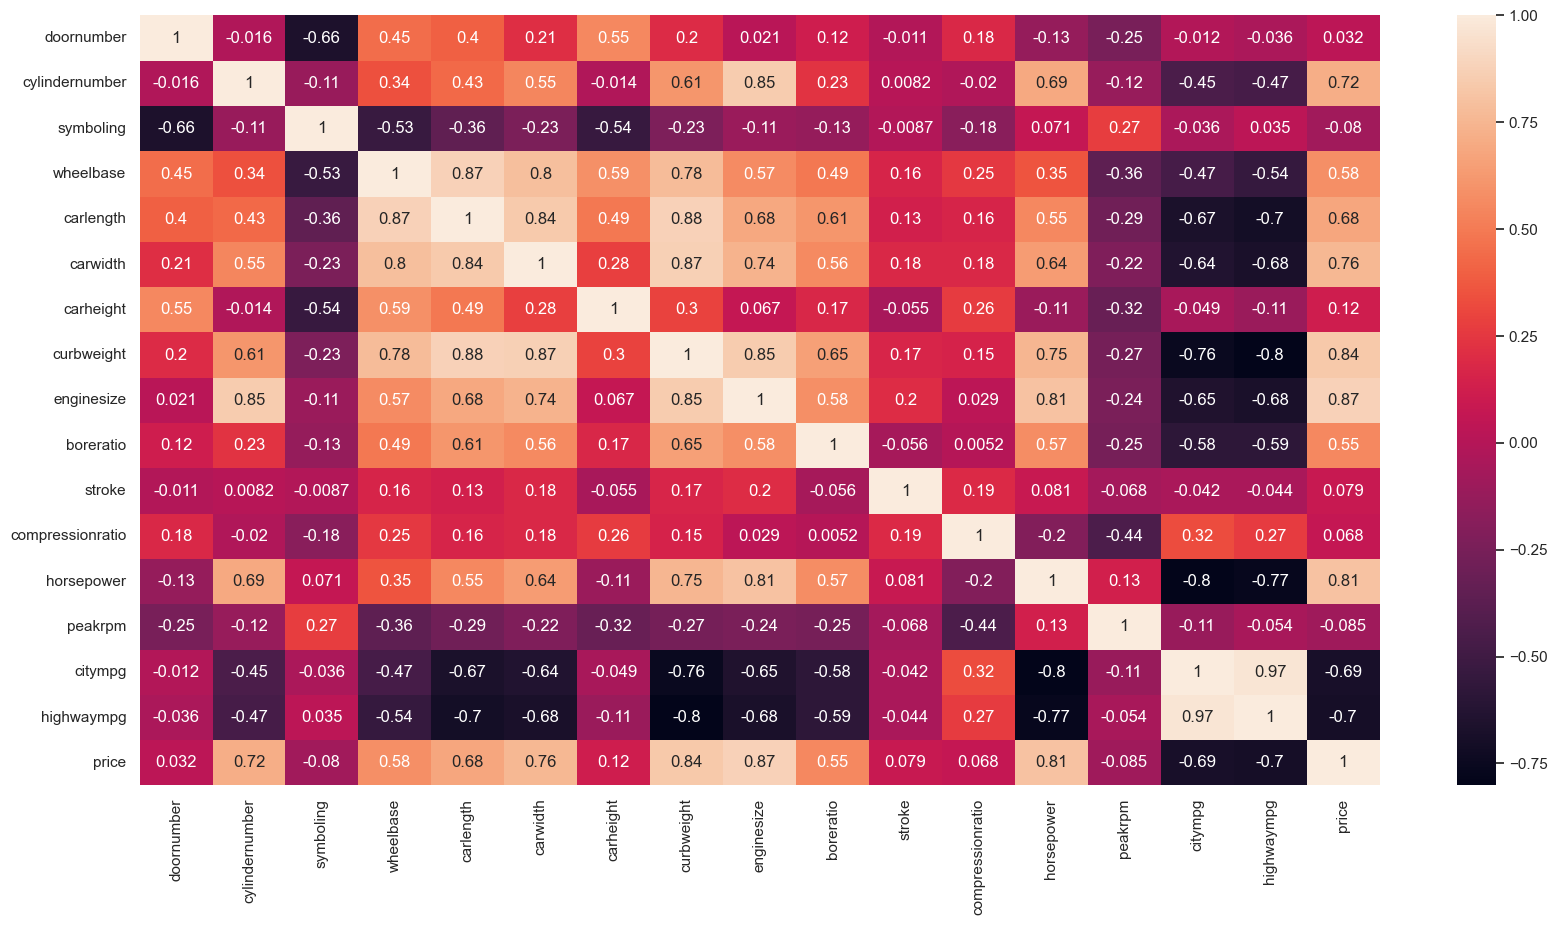

In [4]:
# Correlación de variables

columnas_numericas = ['doornumber', 'cylindernumber', 'symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
corr_coef = np.corrcoef(data[columnas_numericas].values.T)
plt.figure(figsize=(20, 10))
sns.set(font_scale=1)
sns.heatmap(
    corr_coef,
    annot=True,
    yticklabels=columnas_numericas,
    xticklabels=columnas_numericas
)

In [5]:
correlation_matrix = data.corr()
target_correlation = correlation_matrix['price']

# Excluir la correlación con la variable 'price' y consultar las varibles con mayor correlación con el precio
top_correlations = target_correlation.drop('price').abs().sort_values(ascending=False).head(5)

print(top_correlations.index)
print(top_correlations)

# Se obtienen las variables con las correlaciones más altas.

Index(['enginesize', 'curbweight', 'horsepower', 'carwidth', 'cylindernumber'], dtype='object')
enginesize        0.874145
curbweight        0.835305
horsepower        0.808139
carwidth          0.759325
cylindernumber    0.718305
Name: price, dtype: float64


In [6]:
data.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'brand_name_AUDI', 'brand_name_BMW',
       'brand_name_BUICK', 'brand_name_CHEVROLET', 'brand_name_DODGE',
       'brand_name_HONDA', 'brand_name_ISUZU', 'brand_name_JAGUAR',
       'brand_name_MAZDA', 'brand_name_MERCURY', 'brand_name_MITSUBISHI',
       'brand_name_NISSAN', 'brand_name_PEUGEOT', 'brand_name_PLYMOUTH',
       'brand_name_PORSCHE', 'brand_name_RENAULT', 'brand_name_SAAB',
       'brand_name_SUBARU', 'brand_name_TOYOTA', 'brand_name_VOLKSWAGEN',
       'brand_name_VOLVO', 'fueltype_GAS', 'aspiration_TURBO',
       'carbody_HARDTOP', 'carbody_HATCHBACK', 'carbody_SEDAN',
       'carbody_WAGON', 'drivewheel_FWD', 'drivewheel_RWD',
       'enginelocation_REAR', 'enginetype_DOHCV', 'enginetype_L',
       'enginetype_OHC', '

## MODELO DE CLASIFICACIÓN KNN:

3. División del dataset en características (x) y variable objetivo (y):

In [7]:
VARS = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'brand_name_AUDI', 'brand_name_BMW',
       'brand_name_BUICK', 'brand_name_CHEVROLET', 'brand_name_DODGE',
       'brand_name_HONDA', 'brand_name_ISUZU', 'brand_name_JAGUAR',
       'brand_name_MAZDA', 'brand_name_MERCURY', 'brand_name_MITSUBISHI',
       'brand_name_NISSAN', 'brand_name_PEUGEOT', 'brand_name_PLYMOUTH',
       'brand_name_PORSCHE', 'brand_name_RENAULT', 'brand_name_SAAB',
       'brand_name_SUBARU', 'brand_name_TOYOTA', 'brand_name_VOLKSWAGEN',
       'brand_name_VOLVO', 'fueltype_GAS', 'aspiration_TURBO',
       'carbody_HARDTOP', 'carbody_HATCHBACK', 'carbody_SEDAN',
       'carbody_WAGON', 'drivewheel_FWD', 'drivewheel_RWD',
       'enginelocation_REAR', 'enginetype_DOHCV', 'enginetype_L',
       'enginetype_OHC', 'enginetype_OHCF', 'enginetype_OHCV',
       'enginetype_ROTOR', 'fuelsystem_2BBL', 'fuelsystem_4BBL',
       'fuelsystem_IDI', 'fuelsystem_MFI', 'fuelsystem_MPFI',
       'fuelsystem_SPDI', 'fuelsystem_SPFI']
TARGET = ['price_category']

x = data[VARS]
y = data[TARGET]

4. División de datos en cojuntos de entrenamiento y testeo

In [8]:
# División de datos en conjuntos de entrenamiento y prueba:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

5. Entrenamiento y búsqueda de 'k' óptimo para el modelo para clasificación:

In [9]:
warnings.filterwarnings('ignore') #Ignorar advertencias

# Definir el modelo
model = KNeighborsClassifier()

# Definir los hiperparámetros a ajustar y sus posibles valores
param_grid = {
    'n_neighbors': list(range(3, len(x_train)//2 + 1)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Realizar la búsqueda de cuadrícula
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall') # se cambia scoring='accuracy' por 'recall' para disminuir la exhaustividad
grid_search.fit(x_train, y_train)

# Obtener los mejores hiperparámetros y el modelo ajustado
best_params_grid = grid_search.best_params_
best_model_grid = grid_search.best_estimator_

# Imprimir los mejores parámetros encontrados con la búsqueda de cuadrícula
print("Mejores hiperparámetros (GridSearchCV):")
print(best_params_grid)

# Realizar predicciones en el conjunto de prueba con el mejor modelo de la búsqueda de cuadrícula
predictions_grid = best_model_grid.predict(x_test)

Mejores hiperparámetros (GridSearchCV):
{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}


In [10]:
print(best_model_grid)
print(f"Mejor precisión durante la validación cruzada: {grid_search.best_score_:.2f}")

KNeighborsClassifier(n_neighbors=3, weights='distance')
Mejor precisión durante la validación cruzada: 0.94


6. Matrix de Confusión:

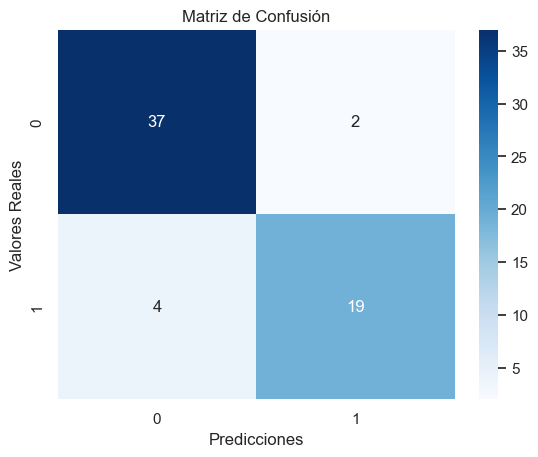

In [11]:
# Obtener la matriz de confusión para el conjunto de prueba
conf_matrix = confusion_matrix(y_test, predictions_grid)

# Crear un mapa de calor con seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

In [12]:
print('accuracy = ',accuracy_score(y_test, predictions_grid))
print('sensibilidad = ',recall_score(y_test, predictions_grid, pos_label = 1))
print('especificidad = ',recall_score(y_test, predictions_grid, pos_label = 0))

accuracy =  0.9032258064516129
sensibilidad =  0.8260869565217391
especificidad =  0.9487179487179487


7. Pronosticar un nuevo resultado de prueba:

In [13]:
# Suponiendo que tienes un nuevo conjunto de características para predecir
nueva_observacion = [[-1,4,103.13,174.76,64.6,59,8,2535,4,122,3.34,3.46,8.5,88,5000,24,30,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0]]

# Realizar la predicción con el mejor modelo de la búsqueda de cuadrícula
prediccion_nueva_observacion = best_model_grid.predict(nueva_observacion)

print(f"Predicción para la nueva observación: {prediccion_nueva_observacion}")


Predicción para la nueva observación: [0]


8. Validación cruzada LOOCV:

In [14]:
loo = LeaveOneOut()
accuracy_scores_loo = cross_val_score(best_model_grid, x_test, y_test, cv=loo, scoring='accuracy')

In [15]:
# Datos de la validación:

print("Puntuaciones de Precisión LOOCV:")
print(accuracy_scores_loo)

# Imprimir la Precisión Promedio
average_accuracy_loo = accuracy_scores_loo.mean()
print(f'Precisión promedio LOOCV: {average_accuracy_loo:.2f}')

Puntuaciones de Precisión LOOCV:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Precisión promedio LOOCV: 0.89


9. Resumen del modelo de claisificación:

| characteristic  | detail |
|-----------------|--------------------|
| Modelo          | K_Nearest_Neighbor |
| n_neighbors     | 3                  |
| weights         | distance           |
| accuracy        | 0.90               |
| sensibilidad    | 0.83               |
| especificidad   | 0.95               |
| validación LOOCV   | 0.89              |

*Nota:* `n_neighbors` (k) optimizado mediante grid_search sobre la valoración de 3 hasta la mitad de los registros.


## MODELO DE REGRESIÓN KNN:

10. División del dataset en características 'x' y variable objetivo 'y':

In [16]:
VARSr = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'brand_name_AUDI', 'brand_name_BMW',
       'brand_name_BUICK', 'brand_name_CHEVROLET', 'brand_name_DODGE',
       'brand_name_HONDA', 'brand_name_ISUZU', 'brand_name_JAGUAR',
       'brand_name_MAZDA', 'brand_name_MERCURY', 'brand_name_MITSUBISHI',
       'brand_name_NISSAN', 'brand_name_PEUGEOT', 'brand_name_PLYMOUTH',
       'brand_name_PORSCHE', 'brand_name_RENAULT', 'brand_name_SAAB',
       'brand_name_SUBARU', 'brand_name_TOYOTA', 'brand_name_VOLKSWAGEN',
       'brand_name_VOLVO', 'fueltype_GAS', 'aspiration_TURBO',
       'carbody_HARDTOP', 'carbody_HATCHBACK', 'carbody_SEDAN',
       'carbody_WAGON', 'drivewheel_FWD', 'drivewheel_RWD',
       'enginelocation_REAR', 'enginetype_DOHCV', 'enginetype_L',
       'enginetype_OHC', 'enginetype_OHCF', 'enginetype_OHCV',
       'enginetype_ROTOR', 'fuelsystem_2BBL', 'fuelsystem_4BBL',
       'fuelsystem_IDI', 'fuelsystem_MFI', 'fuelsystem_MPFI',
       'fuelsystem_SPDI', 'fuelsystem_SPFI']
       
TARGETr = ['price']

xr = data[VARSr]
yr = data[TARGETr]

11. Escalamiento de datos y división de datos en cojuntos de entrenamiento y texteo

In [17]:
# División de datos en conjuntos de entrenamiento y prueba:
x_trainr, x_testr, y_trainr, y_testr = train_test_split(xr, yr, test_size=0.3, random_state=123)

# Variables numéricas escaladas:
escr = StandardScaler()
x_train_escr = escr.fit_transform(x_trainr[['doornumber', 'cylindernumber', 'symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']])
x_test_escr = escr.transform(x_testr[['doornumber', 'cylindernumber', 'symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']])


12.  Entrenamiento y búsqueda de hiperparámetros óptimos para el modelo para regresión:

In [18]:
# Definir el modelo para regresión
model_regression = KNeighborsRegressor()

# Definir los hiperparámetros a ajustar y sus posibles valores
param_grid_regression = {
    'n_neighbors': list(range(3, len(x_trainr)//2 + 1)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Realizar la búsqueda de cuadrícula para regresión
grid_search_regression = GridSearchCV(model_regression, param_grid_regression, cv=5, scoring='neg_mean_squared_error')
grid_search_regression.fit(x_trainr, y_trainr)

# Obtener los mejores hiperparámetros y el modelo ajustado
best_params_regression = grid_search_regression.best_params_
best_model_regression = grid_search_regression.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo de la búsqueda de cuadrícula
predictions_regression = best_model_regression.predict(x_testr)


In [19]:
print(best_params_regression)
print(f"Mejor precisión durante la validación cruzada: {grid_search_regression.best_score_:.2f}")

{'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'distance'}
Mejor precisión durante la validación cruzada: -9523245.77


13. Evaluación del modelo correlación (R^2) entre los valores reales del testeo y las predicciones:

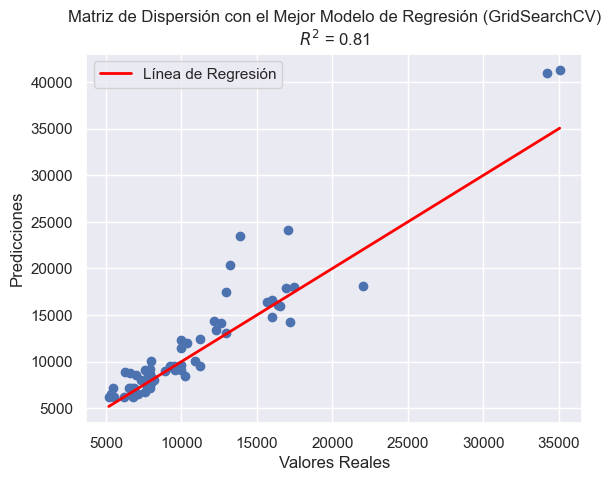

In [20]:
# Convertir los datos a tipo numérico si es necesario
y_testr = y_testr.astype(float)
predictions_regression = predictions_regression.astype(float)

# Calcular el coeficiente de determinación R^2
r2 = r2_score(y_testr, predictions_regression)

# Crear una línea de regresión
line = np.arange(min(y_testr['price']), max(y_testr['price']),1)
line = line.reshape(-1, 1)
regression_line = line

# Visualizar la matriz de dispersión con la línea de regresión y el R^2
plt.scatter(y_testr, predictions_regression)
plt.plot(line, regression_line, color='red', linewidth=2, label='Línea de Regresión')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title(f'Matriz de Dispersión con el Mejor Modelo de Regresión (GridSearchCV)\n$R^2$ = {r2:.2f}')
plt.legend()
plt.show()



14. Pronosticar un nuevo dato de prueba:

In [21]:
# Suponiendo que tienes un nuevo conjunto de características para predecir
nueva_observacionr = [[-1,4,103.13,174.76,64.6,59,8,2535,4,122,3.34,3.46,8.5,88,5000,24,30,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0]]

# Realizar la predicción con el mejor modelo de la búsqueda de cuadrícula
prediccion_nueva_observacionr = best_model_regression.predict(nueva_observacionr)

print(f"Predicción para la nueva observación: {prediccion_nueva_observacionr}")

Predicción para la nueva observación: [[8274.34039805]]


15. Resumen métricas de evaluación del modelo de regresión:

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_testr, predictions_regression)

# Calcular la raíz cuadrada del error cuadrático medio (RMSE)
rmse = np.sqrt(mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_testr, predictions_regression)

# Calcular el coeficiente de determinación R^2
r2 = r2_score(y_testr, predictions_regression)

# Imprimir las métricas
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz Cuadrada del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2:.2f}")


Error Cuadrático Medio (MSE): 6291026.24
Raíz Cuadrada del Error Cuadrático Medio (RMSE): 2508.19
Error Absoluto Medio (MAE): 1553.91
Coeficiente de Determinación (R^2): 0.81


16. Validación Cruzada 'neg_mean_squared_error':

In [23]:
loo = LeaveOneOut()
mse_scores_loo = cross_val_score(best_model_regression, x_test_escr, y_testr, cv=loo, scoring='neg_mean_squared_error')

# Convertir las puntuaciones de error cuadrático medio negativo a positivo
mse_scores_loo = -mse_scores_loo

# Imprimir las puntuaciones de MSE LOOCV
print("Puntuaciones de MSE LOOCV:")
print(mse_scores_loo)

# Calcular el MSE promedio
average_mse_loo = mse_scores_loo.mean()
print(f'MSE promedio LOOCV: {average_mse_loo:.2f}')


Puntuaciones de MSE LOOCV:
[7.47729563e+05 3.76984130e+08 9.65501871e+06 4.10445194e+04
 2.05219492e+06 4.33511917e+03 1.16243493e+06 9.68831260e+02
 7.75358475e+05 2.41610431e+05 8.02481243e+05 1.92127204e+05
 9.17196689e+05 1.07418870e+06 4.14095398e+04 1.41636697e+05
 2.59085869e+05 1.48424766e+06 3.41421874e+05 3.65849539e+05
 3.30186279e+07 5.97208383e+06 1.95380925e+05 1.37387963e+06
 1.27492955e+07 1.35920039e+05 4.53948536e+06 0.00000000e+00
 1.50449435e+08 4.73392121e+05 5.80897601e+06 5.37824461e+05
 1.34330707e+06 1.21700912e+06 3.45213058e+07 2.42149815e+05
 1.57852412e+06 1.72394437e+06 1.75072163e+06 8.78479645e+06
 2.07614132e+05 5.60290287e+06 1.22168090e+07 2.46024531e+06
 1.57574734e+04 1.51599443e+05 8.38794629e+03 1.09247103e+06
 5.63900745e+06 3.98391793e+06 6.74130647e+06 8.88000245e+04
 1.83973306e+06 9.19500000e+06 7.49607473e+07 1.05055033e+06
 0.00000000e+00 1.22872863e+06 5.83625005e+05 6.37093108e+06
 5.62599167e+04 6.32152036e+05]
MSE promedio LOOCV: 128681

17. Resumen del modelo de regresión:

| characteristic  | detail |
|-----------------|--------------------|
| Modelo          | K_Nearest_Neighbor |
| n_neighbors     | 3                  |
| weights         | distance           |
| algorithm       | ball_tree          |
| scoring_type    | neg_mean_squared_error|
| scoring_value   | -9523245.77|
| MSE   |6291026.24|
| RMSE   |2508.19|
| MAE   |1553.91|
| R^2 (texts vs Predictions) |0.81|
| MSE (validación cruzada - texts) |4162851.92|

*Nota:* `n_neighbors` (k) optimizado mediante grid_search sobre la valoración de 3 hasta la mitad de los registros.


scoring='neg_mean_squared_error'